In [1]:
from tensorboard.backend.event_processing import event_accumulator
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')

In [12]:
def mean_plot(files,titles,plot_title=None,measurement=None):
    if measurement == None:
        measurement = 'Train_AverageReturn'
    color_list = ['darkorange','darkblue','green','slategrey']
    rewards_out = []
    for category in files:
        first_file = True
        rewards = []
        steps = []
        prev_len = 0
        
        for file in category:

            ea = event_accumulator.EventAccumulator(file)
            ea.Reload()
            
            step_len = len(ea.Scalars(measurement))
                
            for i in range(step_len):
                if first_file:
                    rewards.append(ea.Scalars(measurement)[i][2])
                    steps.append(ea.Scalars(measurement)[i][1])
                else: 
                    rewards[i] += ea.Scalars(measurement)[i][2]

                rewards = [np.mean(rewards[i]) for i in range(len(rewards))]

            first_file=False
            prev_len = step_len
            
        rewards_out.append(rewards)
        
    steps = [i for i in range(max([len(rewards_out[k]) for k in range(len(rewards_out))]))]    
    fig = plt.figure(figsize=(8,4))
    ax = plt.subplot(111)
        
    print(steps)
    print(rewards_out[0])
        
    for k in range(len(rewards_out)):
        line, = ax.plot(steps,rewards_out[k],label=titles[k],linewidth=3,color=color_list[k])
    
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,box.width, box.height * 0.9])

    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),fancybox=True, shadow=True, ncol=len(rewards))

    if plot_title != None:
        plt.title(plot_title)
    
    plt.show()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
[106.7286376953125, 231.88832092285156, 217.61329650878906, 252.83921813964844, 280.88348388671875, 263.3773193359375, 318.32684326171875, 311.94818115234375, 318.7485046386719, 289.7428283691406, 323.4259033203125, 303.48223876953125, 269.8690490722656, 330.9840087890625, 305.27197265625, 382.5981750488281, 283.6150207519531, 328.98443603515625, 312.03564453125, 244.6236572265625]


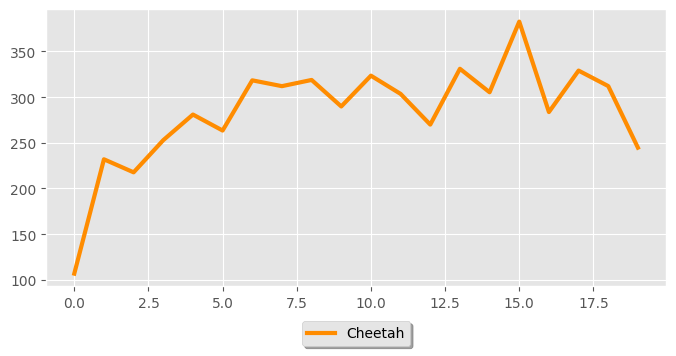

In [19]:
mean_plot([['./data/hw4_q3_cheetah_cheetah-cs285-v0_28-10-2022_22-49-41']],['Cheetah'],measurement='Eval_AverageReturn')

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[-29.81360626220703, -35.49900817871094, -29.745372772216797, -26.979930877685547, -26.79835319519043, -31.53697967529297, -39.71445083618164, -36.51424026489258, -30.98988151550293, -38.04312515258789, -22.751205444335938, -21.638578414916992]


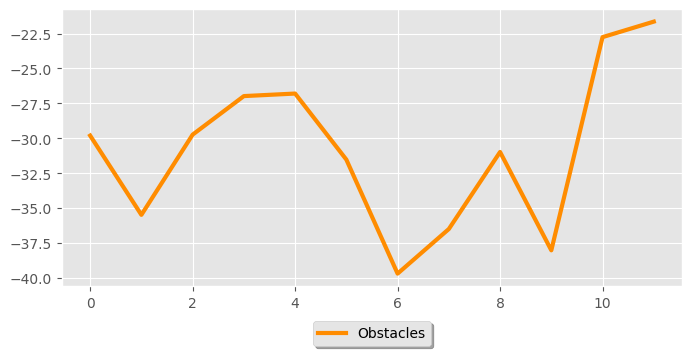

In [20]:
mean_plot([['./data/hw4_q3_obstacles_obstacles-cs285-v0_28-10-2022_18-46-45']],['Obstacles'],measurement='Eval_AverageReturn')

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[-471.14251708984375, -320.988525390625, -308.524658203125, -247.28245544433594, -269.1091003417969, -265.3328857421875, -257.98150634765625, -275.64349365234375, -277.314208984375, -253.76341247558594, -263.2744140625, -257.3081359863281, -253.93536376953125, -253.0375213623047, -247.22222900390625]


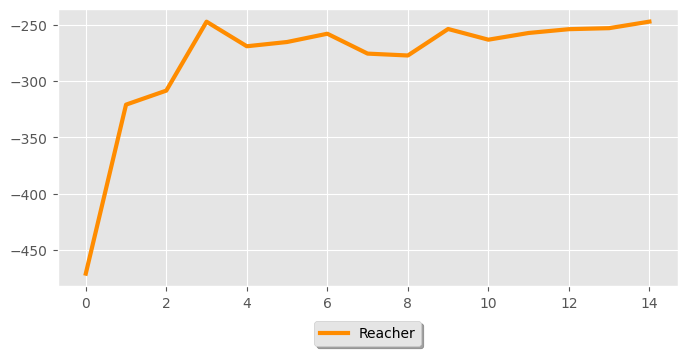

In [18]:
mean_plot([['./data/hw4_q3_reacher_reacher-cs285-v0_28-10-2022_19-20-23']],['Reacher'],measurement='Eval_AverageReturn')

# Q4

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[-393.3153381347656, -312.66943359375, -311.91375732421875, -267.4207763671875, -283.5059509277344, -297.3094482421875, -275.6204833984375, -291.727294921875, -386.7843933105469, -278.20623779296875, -319.4976806640625, -319.67132568359375, -271.32391357421875, -288.8134765625, -314.5423278808594]


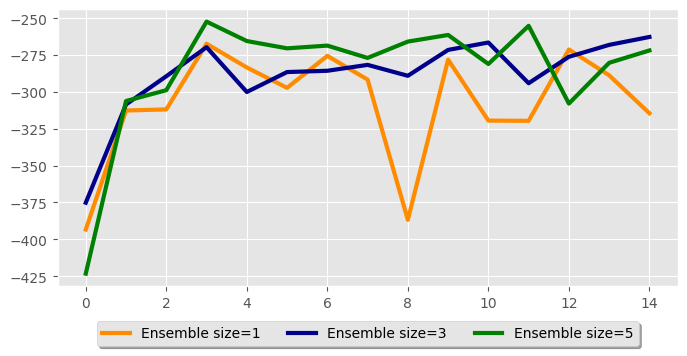

In [22]:
mean_plot([['./data/hw4_q4_reacher_ensemble1_reacher-cs285-v0_30-10-2022_21-10-16'],['./data/hw4_q4_reacher_ensemble3_reacher-cs285-v0_30-10-2022_21-32-22'],['./data/hw4_q4_reacher_ensemble5_reacher-cs285-v0_30-10-2022_22-18-56']],['Ensemble size=1','Ensemble size=3','Ensemble size=5'],measurement='Eval_AverageReturn')

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[-438.0574951171875, -290.1063232421875, -311.0976867675781, -257.3106689453125, -299.6114807128906, -296.568603515625, -257.6762390136719, -283.2108154296875, -248.5764617919922, -287.4405822753906, -355.6698303222656, -281.80706787109375, -250.4477996826172, -296.86981201171875, -243.05941772460938]


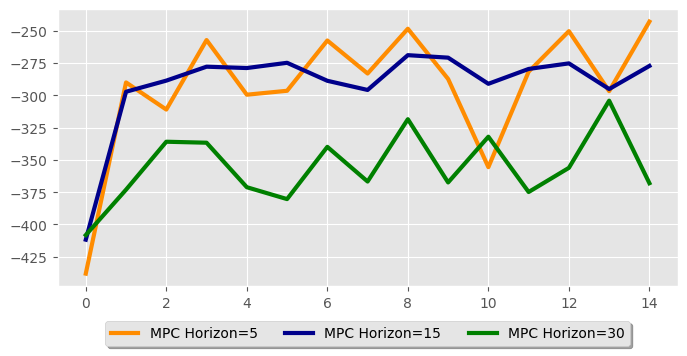

In [25]:
mean_plot([['./data/hw4_q4_reacher_horizon5_reacher-cs285-v0_29-10-2022_05-25-25'],['./data/hw4_q4_reacher_horizon15_reacher-cs285-v0_29-10-2022_05-52-50'],['./data/hw4_q4_reacher_horizon30_reacher-cs285-v0_30-10-2022_14-04-54']],['MPC Horizon=5','MPC Horizon=15','MPC Horizon=30'],measurement='Eval_AverageReturn')

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
[-413.4341125488281, -332.1148681640625, -339.7099609375, -312.74212646484375, -286.490234375, -291.7166442871094, -317.0927734375, -334.7864990234375, -297.0088195800781, -291.4585266113281, -304.8941955566406, -310.80279541015625, -304.5052490234375, -324.16192626953125, -344.8369140625]


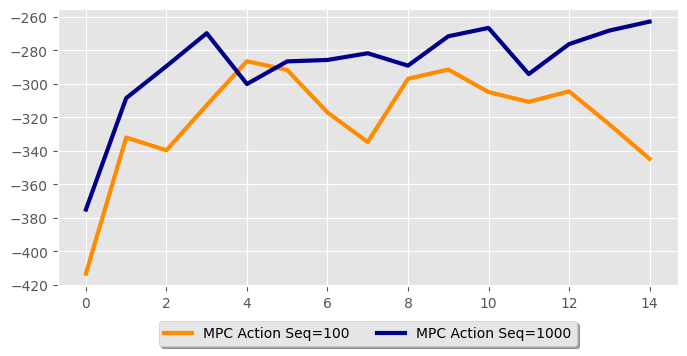

In [26]:
mean_plot([['./data/hw4_q4_reacher_numseq100_reacher-cs285-v0_30-10-2022_19-43-51'],['./data/hw4_q4_reacher_numseq1000_reacher-cs285-v0_30-10-2022_20-02-30']],['MPC Action Seq=100','MPC Action Seq=1000'],measurement='Eval_AverageReturn')

# Q5

[0, 1, 2, 3, 4]
[106.7286376953125, 231.88832092285156, 217.61329650878906, 252.83921813964844, 280.88348388671875]


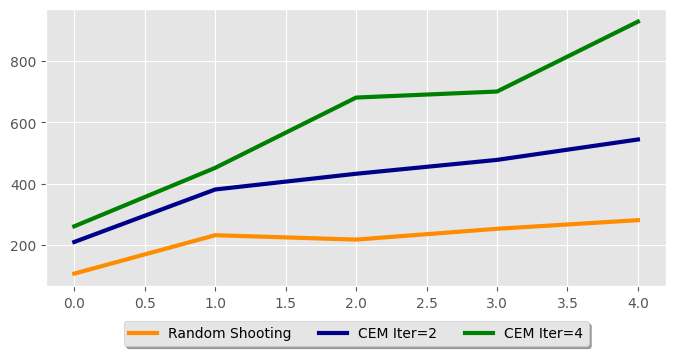

In [27]:
mean_plot([['./data/hw4_q5_cheetah_random_cheetah-cs285-v0_01-11-2022_14-05-23'],['./data/hw4_q5_cheetah_cem_2_cheetah-cs285-v0_01-11-2022_09-59-33'],['./data/hw4_q5_cheetah_cem_4_cheetah-cs285-v0_01-11-2022_16-16-42']],['Random Shooting','CEM Iter=2','CEM Iter=4'],measurement='Eval_AverageReturn')

# Q6

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[-50.207481384277344, -1925.2110595703125, 11.27032470703125, -4.0379486083984375, 59.64109802246094, -1696.535888671875, -11.884214401245117, 70.69975280761719, 163.77598571777344, 223.935546875]


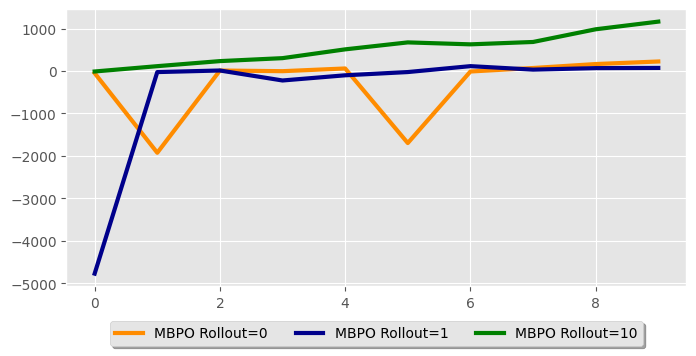

In [30]:
mean_plot([['./data/hw4_q6_cheetah_rlen0_cheetah-cs285-v0_02-11-2022_14-20-15'],['./data/hw4_q6_cheetah_rlen1_cheetah-cs285-v0_02-11-2022_21-00-57'],['./data/hw4_q6_cheetah_rlen10_cheetah-cs285-v0_02-11-2022_19-58-11']],['MBPO Rollout=0','MBPO Rollout=1','MBPO Rollout=10'],measurement='Eval_AverageReturn')